In [21]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from pathlib import Path
from monai.transforms import RandZoom,RandRotate,Rand3DElastic
import os

In [22]:
DATA_DIR = Path(r"C:\Users\11022\Desktop\capitaAI\TrainingData")

In [23]:
patients = [
    path
    for path in DATA_DIR.glob("*")
    if not any(part.startswith(".") for part in path.parts)
]

In [24]:
RandZoomFilt = RandZoom(prob = 1, min_zoom = 0.8, max_zoom = 1.2)
RandRotateFilt = RandRotate(range_x=0.3, range_y=0.3, range_z=0.3, prob=1)
Rand3DElasticFilt = Rand3DElastic(sigma_range = (7,7,7), magnitude_range = (50,50,50) , prob=1, padding_mode = "zeros")

## Filters used sepparately on every image

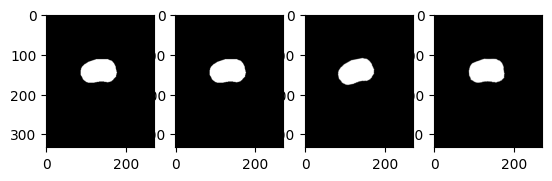

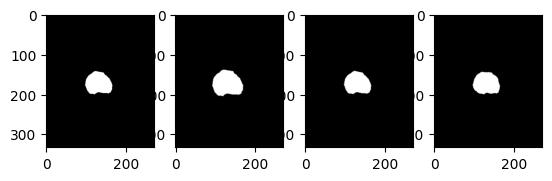

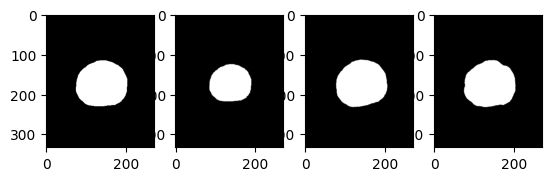

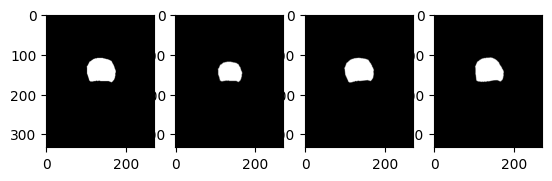

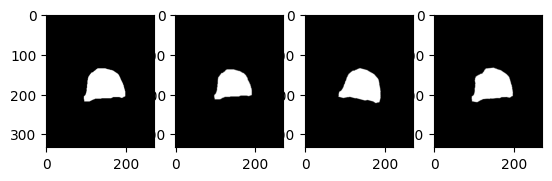

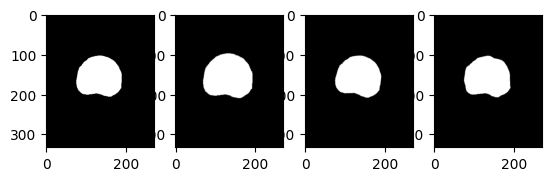

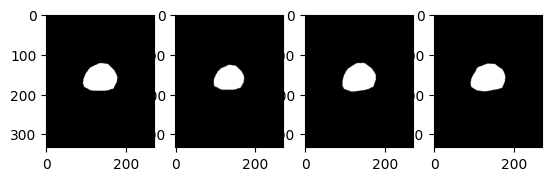

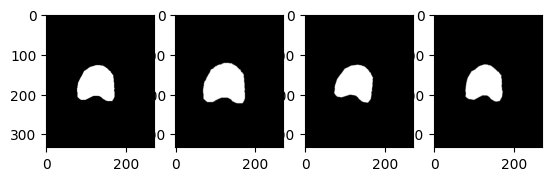

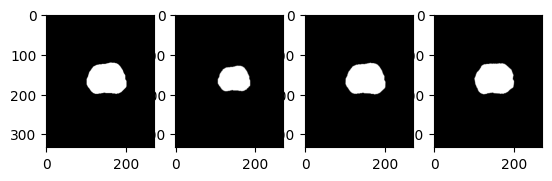

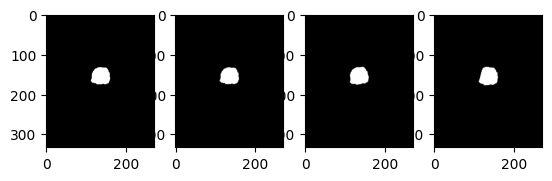

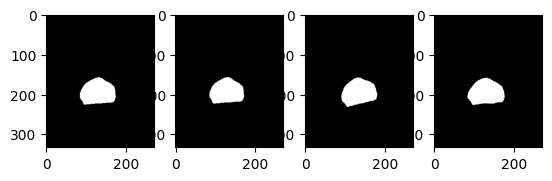

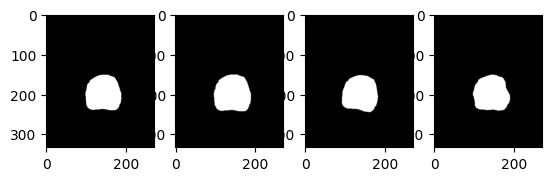

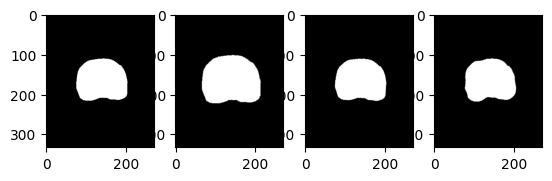

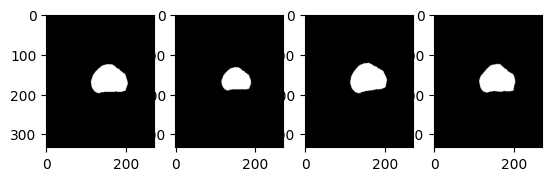

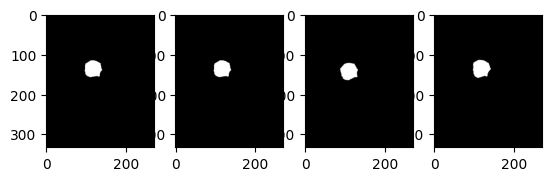

In [25]:
for path in patients:
    f_image_array =sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(path, "prostaat.mhd")))
    plt.figure()
    plt.subplot(141)
    plt.imshow(f_image_array[40,:,:],cmap = "gray")
    plt.subplot(142)
    plt.imshow(RandZoomFilt(f_image_array)[40,:,:],cmap = "gray")
    plt.subplot(143)
    plt.imshow(RandRotateFilt(f_image_array)[40,:,:],cmap = "gray")
    plt.subplot(144)
    plt.imshow(Rand3DElasticFilt(f_image_array)[40,:,:],cmap = "gray")
    plt.show()

## Filters used in combination for some example images

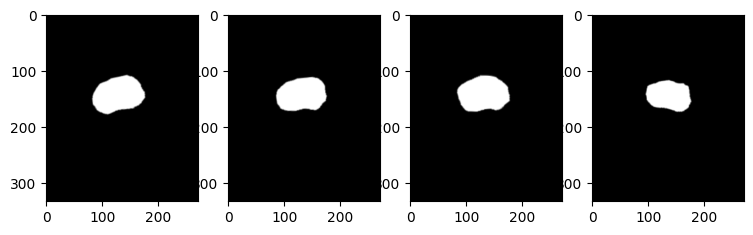

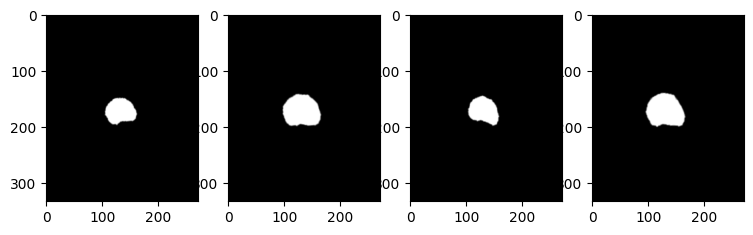

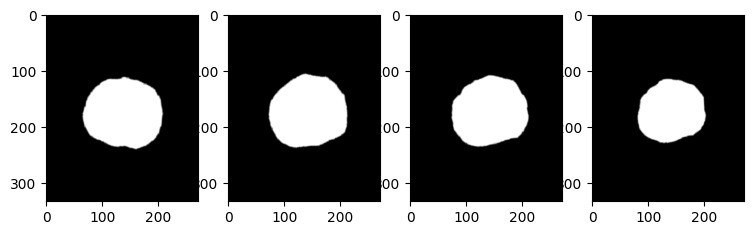

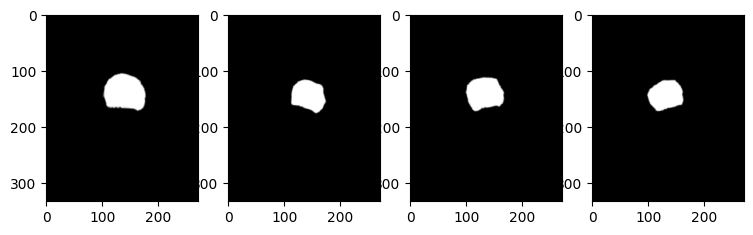

In [26]:
for i in range(4):
    f_image_array =sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(patients[i], "prostaat.mhd")))
    plt.figure(figsize= (9,9))
    plt.subplot(141)
    plt.imshow(RandZoomFilt(RandRotateFilt(Rand3DElasticFilt(f_image_array)))[40,:,:],cmap = "gray")
    plt.subplot(142)
    plt.imshow(RandZoomFilt(RandRotateFilt(Rand3DElasticFilt(f_image_array)))[40,:,:],cmap = "gray")
    plt.subplot(143)
    plt.imshow(RandZoomFilt(RandRotateFilt(Rand3DElasticFilt(f_image_array)))[40,:,:],cmap = "gray")
    plt.subplot(144)
    plt.imshow(RandZoomFilt(RandRotateFilt(Rand3DElasticFilt(f_image_array)))[40,:,:],cmap = "gray")
    plt.show()

## Runs on the same image

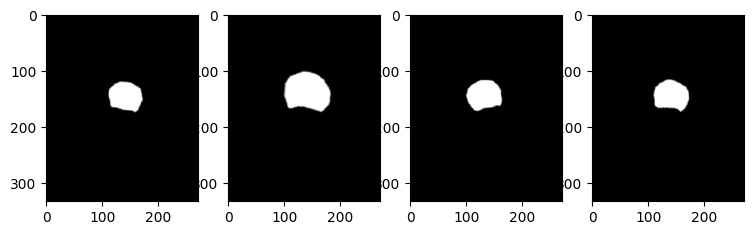

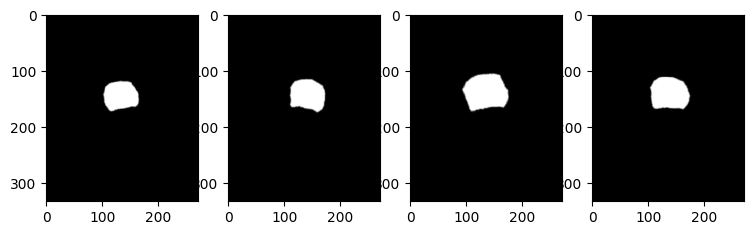

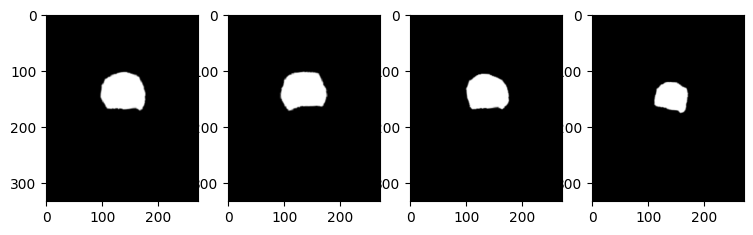

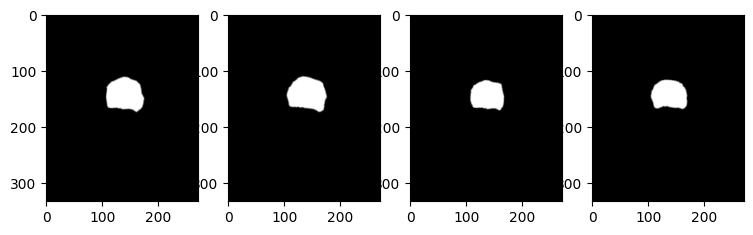

In [27]:
f_image_array =sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(patients[i], "prostaat.mhd")))

for i in range(4):
    plt.figure(figsize= (9,9))
    plt.subplot(141)
    plt.imshow(RandZoomFilt(RandRotateFilt(Rand3DElasticFilt(f_image_array)))[40,:,:],cmap = "gray")
    plt.subplot(142)
    plt.imshow(RandZoomFilt(RandRotateFilt(Rand3DElasticFilt(f_image_array)))[40,:,:],cmap = "gray")
    plt.subplot(143)
    plt.imshow(RandZoomFilt(RandRotateFilt(Rand3DElasticFilt(f_image_array)))[40,:,:],cmap = "gray")
    plt.subplot(144)
    plt.imshow(RandZoomFilt(RandRotateFilt(Rand3DElasticFilt(f_image_array)))[40,:,:],cmap = "gray")
    plt.show()

In [30]:
#to save the results:
import SimpleITK as sitk

target_path = "C:\\Users\\11022\\Desktop\\capitaAI\\result"

os.makedirs(target_path, exist_ok=True)

def save_AUG_image_as_mhd(image_array, filename):

    if not filename.endswith('.mhd'):
        filename += '.mhd'
    
    base_dir = "C:\\Users\\11022\\Desktop\\capitaAI\\result"
    
    save_path = os.path.join(base_dir, filename)
    
    image = sitk.GetImageFromArray(image_array)
    
    sitk.WriteImage(image, save_path)
    
    return save_path

#test: save_AUG_image_as_mhd(RandZoomFilt(f_image_array), "a")




'C:\\Users\\11022\\Desktop\\capitaAI\\result\\a.mhd'